# Imports

In [212]:
import numpy as np
import pandas as pd

In [213]:
import matplotlib.pyplot as plt

# Global variables

Переменные для вычисления (шаг и т. д.)

In [214]:
time_step = 1  # Шаг в годах
additional_prognosis_years = 0


def get_time_array(start: int, end: int, step: float) -> np.ndarray:
    return np.arange(start, end + step, step)

# Funcs

## Math

In [215]:
def malthus_model(t: float, P0: float, r: float) -> float:
    """Вычисляет популяцию по модели Мальтуса.

    Args:
        t (float): Время.
        P0 (float): Начальная численность.
        r (float): Коэффициент роста.

    Returns:
        float: Численность популяции в момент t.
    """
    return P0 * np.exp(r * t)


def logistic_model(t: float, P0: float, r: float, K: float) -> float:
    """Вычисляет популяцию по логистической модели.

    Args:
        t (float): Время.
        P0 (float): Начальная численность.
        r (float): Коэффициент роста
        K (float): Ёмкость среды.        

    Returns:
        float: Численность популяции в момент t.
    """
    return K / (1 + (K - P0) / P0 * np.exp(-r * t))

## Graphics

In [216]:
def plot_population(
    t: float,
    P: float,
    label_model: str,
    t_observed: float = None,
    P_observed: float = None,
) -> None:
    """Построение графика популяции

    Args:
        t (float): Время прогноза.
        P (float): Прогноз.
        label_model (str): Наименование модели
        t_observed (float, optional): Время наблюдений. Defaults to None.
        P_observed (float, optional): Наблюдения. Defaults to None.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(t, P, "b-", linewidth=2, label=label_model)
    if t_observed is not None and P_observed is not None:
        plt.plot(
            t_observed, P_observed, "ro", markersize=6, label="Оригинальные данные"
        )
    plt.xlabel("Время")
    plt.ylabel("Численность популяции")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# China (Malthus)

# Data check

Последняя строка проверочная

In [217]:
df_china = pd.read_csv("../data/china.csv", index_col=0, dtype={"persons": "int"})
china_person_multiplier = int(1e3)

df_china

,persons,birth_rate,death_rate,natural_rate
year,,,,
2014,1371860,13.83,7.12,6.71
2015,1379860,11.99,7.07,4.93
2016,1387790,12.95,7.09,5.86
2017,1396215,12.64,7.06,5.58
2018,1402760,10.86,7.08,3.78
2019,1407745,10.41,7.09,3.32
2020,1411100,8.52,7.07,1.45


In [218]:
calc_idx_china = 0

china_timeline = df_china.index
china_population_timeline = df_china["persons"]

starting_year_china = china_timeline[calc_idx_china]
predict_idx_china = [i for i in range(1, len(df_china))]
interval_len_china = len(df_china) - 1

birth_rate_mean_china = df_china["birth_rate"].mean()
death_rate_mean_china = df_china["death_rate"].mean()
natural_rate_mean_china = df_china["natural_rate"].mean()

In [219]:
P0_china = df_china["persons"].iloc(0)[0]
r_china = natural_rate_mean_china / 100

In [220]:
r_china


np.float64(0.04518571428571429)

## Calculation

### Malthus

In [221]:
# r_china = 0.005

In [222]:
t_china = get_time_array(
    starting_year_china - starting_year_china,
    df_china.index[predict_idx_china[-1]] - starting_year_china + additional_prognosis_years,
    time_step,
)
P_malthus_china = malthus_model(
    t_china,
    P0_china,
    r_china - 0.04,
    # 0.005,
)
P_malthus_china

array([1371860.        , 1378992.55170381, 1386162.18685185,
       1393369.09824776, 1400613.47969757, 1407895.52601498,
       1415215.43302653])

In [223]:
china_population_timeline

year
2014    1371860
2015    1379860
2016    1387790
2017    1396215
2018    1402760
2019    1407745
2020    1411100
Name: persons, dtype: int64

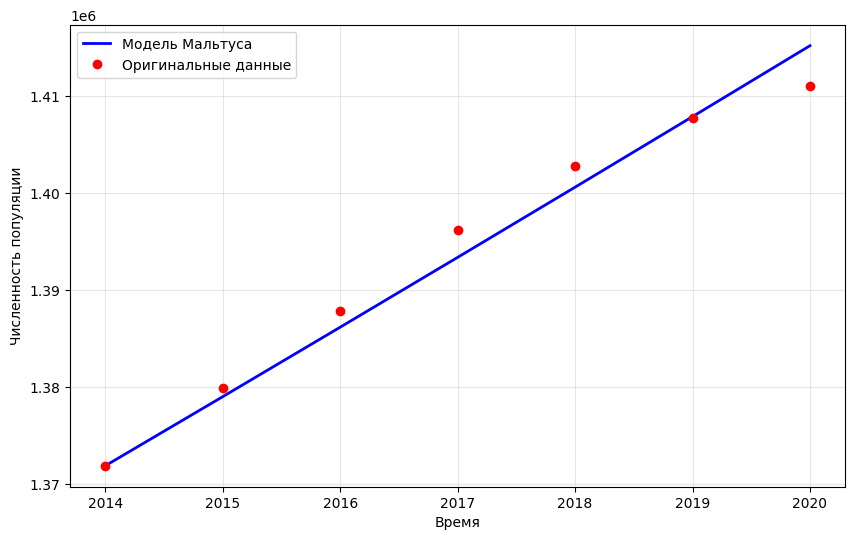

In [224]:
plot_population(t_china + starting_year_china, P_malthus_china, "Модель Мальтуса", china_timeline, china_population_timeline)

### Logistic

In [225]:
t_china = get_time_array(
    starting_year_china - starting_year_china,
    df_china.index[predict_idx_china[-1]] - starting_year_china + additional_prognosis_years,
    time_step,
)
P_logistic_china = logistic_model(
    t_china,
    P0_china,
    r_china + 0.3,
    1412360,
)
P_logistic_china

array([1371860.        , 1383440.32491011, 1391759.16527203,
       1397710.40310373, 1401955.28025656, 1404976.65633355,
       1407123.94646661])

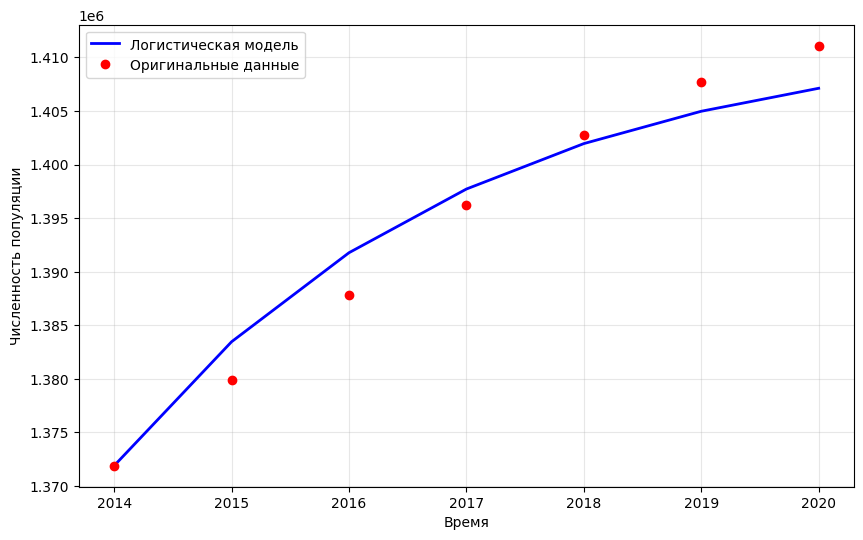

In [226]:
plot_population(t_china + starting_year_china, P_logistic_china, "Логистическая модель", china_timeline, china_population_timeline)